In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data_yaml = """
train: /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train
val: /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid
nc: 8
names:
  - Bad_Apple
  - Bad_Guava
  - Bad_Mango
  - Bad_Orange
  - Good_Apple
  - Good_Guava
  - Good_Mango
  - Good_Orange
"""

# Save the file
with open('/kaggle/working/data.yaml', 'w') as file:
    file.write(data_yaml)

print("✅ `data.yaml` has been created successfully!")

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 14.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO

# Initialize YOLO model from scratch (no pretrained weights)
model = YOLO('yolov8s.yaml')  # Using YOLOv8s architecture

# Train the model
model.train(
    data='/kaggle/working/data.yaml',  # Path to your data.yaml
    epochs=10,
    imgsz=640,
    batch=16,
    project='/kaggle/working/fruitnet_training_scratch',
    name='experiment1',
    pretrained=False  # Training from scratch
)


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment12/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_108.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()

In [ ]:
from ultralytics import YOLO

# Load the last trained model
model = YOLO('/kaggle/working/fruitnet_training_scratch/experiment12/weights/last.pt')

# Train again with additional epochs
model.train(
    data='/kaggle/working/data.yaml',  # Path to your dataset config
    epochs=10,  # Additional epochs
    imgsz=640,
    batch=16,
    project='/kaggle/working/fruitnet_training_scratch',
    name='experiment12_continued',
    resume=False  # Ensure it starts fresh training from the previous weights
)

print("✅ Training resumed successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x640 (no detections), 576.0ms
Speed: 11.8ms preprocess, 576.0ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


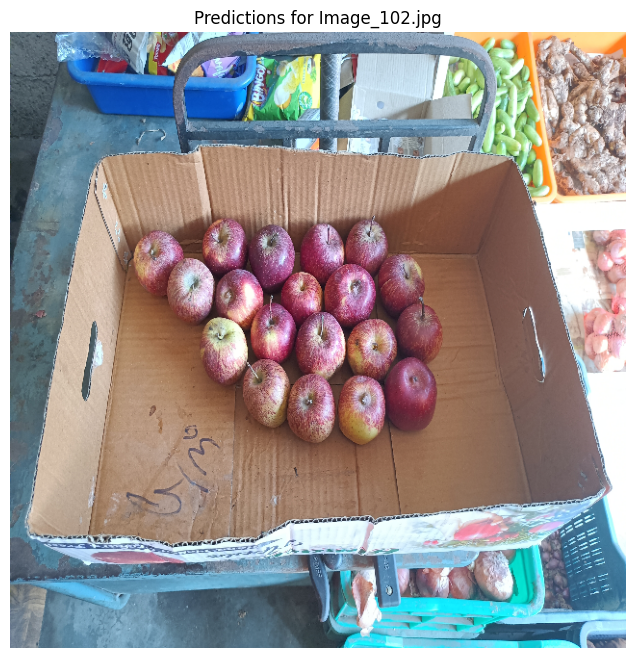

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Apple/Image_102.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()


0: 640x640 1 Good_Mango, 441.0ms
Speed: 2.7ms preprocess, 441.0ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)


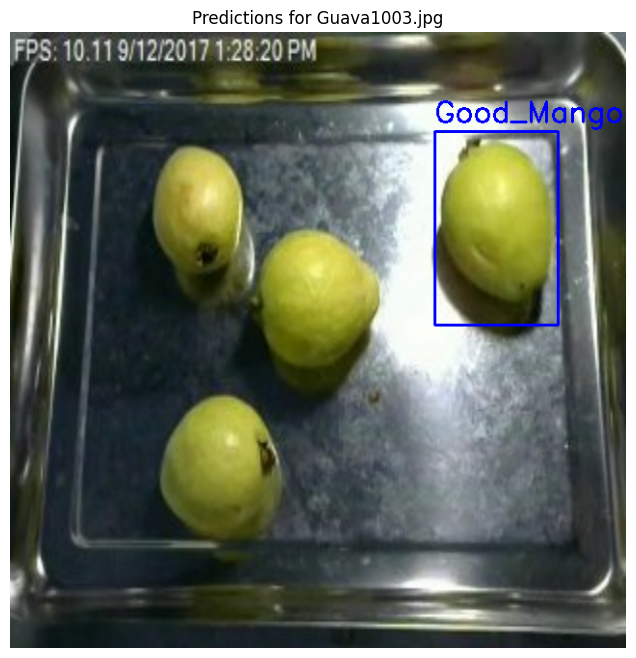

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Guava/Guava1003.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()


0: 640x640 1 Good_Mango, 456.8ms
Speed: 2.6ms preprocess, 456.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


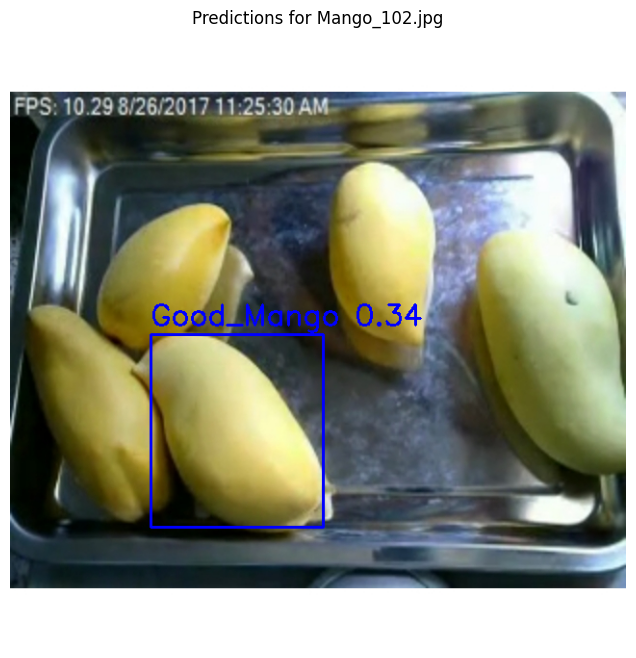

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_102.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()

In [5]:
import os
from collections import defaultdict

# Path to label files
labels_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels"

# Define class ID to fruit name mapping (from your `data.yaml`)
class_mapping = {
    "0": "Bad_Apple",
    "1": "Bad_Guava",
    "2": "Bad_Mango",
    "3": "Bad_Orange",
    "4": "Good_Apple",
    "5": "Good_Guava",
    "6": "Good_Mango",
    "7": "Good_Orange"
}

# Dictionary to count occurrences of each fruit type
fruit_counts = defaultdict(int)

# Get all label files
label_files = [f for f in os.listdir(labels_path) if f.endswith(".txt")]

# Iterate through label files
for label_file in label_files:
    with open(os.path.join(labels_path, label_file), "r") as file:
        for line in file:
            parts = line.strip().split()
            if parts:  # Ensure line isn't empty
                class_id = parts[0]  # First value is the class ID
                fruit_counts[class_id] += 1

# Print results with fruit names
if fruit_counts:
    print("\n🍏 **Fruit Count Summary** 🍊")
    for class_id, count in sorted(fruit_counts.items()):
        fruit_name = class_mapping.get(class_id, f"Unknown ({class_id})")  # Default if not found
        print(f"{fruit_name}: {count} instances")
else:
    print("⚠️ No fruit data found in labels.")



🍏 **Fruit Count Summary** 🍊
Bad_Apple: 301 instances
Bad_Guava: 371 instances
Bad_Mango: 334 instances
Bad_Orange: 335 instances
Good_Apple: 383 instances
Good_Guava: 309 instances
Good_Mango: 377 instances
Good_Orange: 367 instances


In [6]:
import yaml

yaml_path = "/kaggle/working/data.yaml"  # Change this path if needed

# Load YAML file
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)

# Get class names from YAML
class_mapping = {str(i): name for i, name in enumerate(data["names"])}

# Print the verified class mapping
print("\n✅ Verified Class Mapping from data.yaml:")
for class_id, fruit_name in class_mapping.items():
    print(f"Class {class_id}: {fruit_name}")



✅ Verified Class Mapping from data.yaml:
Class 0: Bad_Apple
Class 1: Bad_Guava
Class 2: Bad_Mango
Class 3: Bad_Orange
Class 4: Good_Apple
Class 5: Good_Guava
Class 6: Good_Mango
Class 7: Good_Orange


In [7]:
from collections import defaultdict
import os

labels_path = data["train"] + "/labels"  # Auto-detect labels folder

# Dictionary to store fruit counts
fruit_counts = defaultdict(int)

# List label files
label_files = [f for f in os.listdir(labels_path) if f.endswith(".txt")]

# Count instances
for label_file in label_files:
    with open(os.path.join(labels_path, label_file), "r") as file:
        for line in file:
            parts = line.strip().split()
            if parts:
                class_id = parts[0]  # Extract class ID
                fruit_counts[class_id] += 1

# Print results
print("\n✅ Final Verified Count Summary:")
for class_id, count in sorted(fruit_counts.items()):
    fruit_name = class_mapping.get(class_id, f"Unknown ({class_id})")
    print(f"{fruit_name}: {count} instances")



✅ Final Verified Count Summary:
Bad_Apple: 301 instances
Bad_Guava: 371 instances
Bad_Mango: 334 instances
Bad_Orange: 335 instances
Good_Apple: 383 instances
Good_Guava: 309 instances
Good_Mango: 377 instances
Good_Orange: 367 instances


In [4]:
import os
import cv2
import random
import numpy as np
import shutil

# Paths
train_images_dir = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images"
train_labels_dir = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels"
output_images_dir = "/kaggle/working/augmented/images"
output_labels_dir = "/kaggle/working/augmented/labels"

os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_labels_dir, exist_ok=True)

# Class names from your YAML file
class_names = [
    "Bad_Apple", "Bad_Guava", "Bad_Mango", "Bad_Orange",
    "Good_Apple", "Good_Guava", "Good_Mango", "Good_Orange"
]

# Count existing images per class
class_counts = {name: 0 for name in class_names}
image_files = [f for f in os.listdir(train_images_dir) if f.endswith(('.jpg', '.png'))]

for img_file in image_files:
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join(train_labels_dir, label_file)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()
            if not lines:  # Empty label file
                print(f"⚠️ Warning: Empty label file found -> {label_file}")
                continue
            
            first_class_id = int(lines[0].split()[0])  # Get first class ID
            
            if first_class_id >= len(class_names):
                print(f"⚠️ Warning: Invalid class ID ({first_class_id}) in {label_file}")
                continue
            
            class_name = class_names[first_class_id]
            class_counts[class_name] += 1

# Find the max count (383) and compute how many need augmentation
max_count = max(class_counts.values())

# Function for augmentation
def augment_image(image, brightness_factor=None, flip=False):
    if flip:
        image = cv2.flip(image, 1)  # Horizontal Flip

    if brightness_factor is not None:
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[..., 2] = np.clip(hsv[..., 2] * brightness_factor, 0, 255)
        image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return image

# Augment images
for img_file in image_files:
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join(train_labels_dir, label_file)
    image_path = os.path.join(train_images_dir, img_file)

    if not os.path.exists(label_path):
        continue

    with open(label_path, "r") as f:
        lines = f.readlines()
        if not lines:
            continue
        
        first_class_id = int(lines[0].split()[0])
        class_name = class_names[first_class_id]

    # Copy original image & label
    shutil.copy(image_path, os.path.join(output_images_dir, img_file))
    shutil.copy(label_path, os.path.join(output_labels_dir, label_file))

    # Augment until reaching 383 images
    extra_needed = max_count - class_counts[class_name]
    if extra_needed > 0:
        image = cv2.imread(image_path)
        for i in range(extra_needed):
            aug_image = augment_image(image, brightness_factor=random.uniform(0.7, 1.3), flip=(i % 2 == 0))

            aug_img_name = f"{os.path.splitext(img_file)[0]}_aug{i}.jpg"
            aug_label_name = f"{os.path.splitext(label_file)[0]}_aug{i}.txt"

            cv2.imwrite(os.path.join(output_images_dir, aug_img_name), aug_image)
            shutil.copy(label_path, os.path.join(output_labels_dir, aug_label_name))

# Summary
print("✅ Augmentation complete! All classes now have 383 images.")


⚠️ Warning: Empty label file found -> lasio_145_jpg.rf.75bdfb688e70141e41b5ed4a386114e1.txt
⚠️ Warning: Empty label file found -> IMG_20190923_175638_jpg.rf.22aa64b0c02630540d5f19c56c8e37e1.txt
⚠️ Warning: Empty label file found -> IMG_20190824_175536_jpg.rf.3f69d8868b4f70b7588164a21542e831.txt
⚠️ Warning: Empty label file found -> IMG_20190824_175536_jpg.rf.aae7284e84055b6eda1f3eadb39de6e0.txt
⚠️ Warning: Empty label file found -> NAV-62-_jpg.rf.2591a26f8b036b396dc1b624cd3b9506.txt
⚠️ Warning: Empty label file found -> aspergillus_036_jpg.rf.783900a921c014247e059b0e20eb271a.txt
⚠️ Warning: Empty label file found -> IMG_20190824_174910_1_jpg.rf.6cf8df3faf2d930067e68adb7bab4f7c.txt
⚠️ Warning: Empty label file found -> lasio_145_jpg.rf.3c394ef98f694434f46cbc0e84833c99.txt
⚠️ Warning: Empty label file found -> IMG_20190923_175638_jpg.rf.0fe251f9fa97072122c4dc60bbc9e97f.txt
⚠️ Warning: Empty label file found -> healthy_135_jpg.rf.e69fd18c8d945e02d02325a559fd1d3e.txt
⚠️ Warning: Empty labe

KeyboardInterrupt: 

In [2]:
import os

print(os.listdir("/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images")[:10])
print(os.listdir("/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels")[:10])


['Screen-Shot-2018-06-13-at-12-18-40-AM_png.rf.771c9eae2b9d646a00d201573345fff3.jpg', 'IMG_20190923_181817_jpg.rf.1affa9e75be43b94da4315c2ba8b9904.jpg', 'anthracnose_034_jpg.rf.42c5972e46e68feaf0a763e6fbfb4277.jpg', 'IMG_20190910_172748_1_jpg.rf.e224d872e902c161ab3fc7a6cd13b441.jpg', 'BadMango-86-_jpg.rf.aa843d0b23800593b21aa80011015dbf.jpg', 'IMG20200728185300_01_jpg.rf.ba936e5689a3febeb1e69a38738a2328.jpg', '765ac667-ed3d-4bd3-9c59-d498fadd7a27-re_wm_jpeg.rf.665d5edc82a00b5e32ef93d5a1ccfc16.jpg', 'IMG_20190910_172415_1_jpg.rf.a917f22c817bdb2493cfed90f8867567.jpg', 'healthy_150_jpg.rf.f42cc4fc80fbeafbd68ff4d04c8c95ac.jpg', 'IMG_20190910_172747_jpg.rf.2e1044026a1015b45e21aa0e497f8179.jpg']
['IMG_20190824_175536_jpg.rf.aae7284e84055b6eda1f3eadb39de6e0.txt', 'orange-isolated-3-_jpg.rf.5f0ed435959788cacfcfbabb0afaf0c5.txt', 'alamy-1705603662_jpg.rf.8d33654054864620efa547e516378322.txt', '20190809_161509_jpg.rf.346e6e2c48125376675220680cb8ef34.txt', 'IMG_7934_JPG.rf.c3dc5c96133df4e20558c1a

In [5]:
pip install albumentations


Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import cv2
import albumentations as A
import shutil

# Define augmentation transformations (flipping & brightness adjustment)
augmentations = [
    A.HorizontalFlip(p=1.0),  # Flip horizontally
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0)  # Adjust brightness & contrast
]

# Paths (Update these paths to match your dataset structure)
train_images_dir = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images"
train_labels_dir = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels"
output_images_dir = "/kaggle/working/augmented_dataset/images"
output_labels_dir = "/kaggle/working/augmented_dataset/labels"

# Ensure output directories exist
os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_labels_dir, exist_ok=True)

# Class distribution before augmentation (update these counts if needed)
class_counts = {
    "Bad_Apple": 301,
    "Bad_Guava": 371,
    "Bad_Mango": 334,
    "Bad_Orange": 335,
    "Good_Apple": 383,  # Highest count (reference)
    "Good_Guava": 309,
    "Good_Mango": 377,
    "Good_Orange": 367
}
max_count = max(class_counts.values())  # 383 (Reference count)

# Function to apply augmentation
def augment_image(image_path, label_path, aug_transform, output_image_path, output_label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply augmentation
    augmented = aug_transform(image=image)
    aug_image = augmented["image"]

    # Save augmented image
    cv2.imwrite(output_image_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))

    # Copy corresponding label file
    shutil.copy(label_path, output_label_path)

# Process each class
for fruit, count in class_counts.items():
    print(f"🔄 Augmenting {fruit}: Need {max_count - count} more images...")

    image_dir = os.path.join(train_images_dir, fruit)
    label_dir = os.path.join(train_labels_dir, fruit)

    if not os.path.exists(image_dir) or not os.path.exists(label_dir):
        print(f"❌ Skipping {fruit} (Directory not found)")
        continue

    # Collect all image-label pairs
    image_files = [img for img in os.listdir(image_dir) if img.endswith(('.jpg', '.png'))]
    fruit_images, fruit_labels = [], []

    for img_file in image_files:
        label_file = img_file.replace(".jpg", ".txt").replace(".png", ".txt")
        label_path = os.path.join(label_dir, label_file)

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                first_line = f.readline().strip()
                if not first_line:
                    print(f"⚠ Warning: Empty label file - {label_file}. Skipping...")
                    continue  
                fruit_images.append(img_file)
                fruit_labels.append(label_file)

    # Apply augmentation to match max_count
    extra_needed = max_count - count
    idx = 0

    while extra_needed > 0:
        img_file = fruit_images[idx % len(fruit_images)]  # Cycle through existing images
        label_file = fruit_labels[idx % len(fruit_labels)]
        
        image_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, label_file)

        # Apply augmentation
        for aug in augmentations:
            if extra_needed <= 0:
                break

            aug_image_name = f"aug_{idx}_{img_file}"
            aug_label_name = f"aug_{idx}_{label_file}"
            output_image_path = os.path.join(output_images_dir, aug_image_name)
            output_label_path = os.path.join(output_labels_dir, aug_label_name)

            augment_image(image_path, label_path, aug, output_image_path, output_label_path)

            extra_needed -= 1
            idx += 1

print("✅ Dataset augmentation completed successfully!")


🔄 Augmenting Bad_Apple: Need 82 more images...
❌ Skipping Bad_Apple (Directory not found)
🔄 Augmenting Bad_Guava: Need 12 more images...
❌ Skipping Bad_Guava (Directory not found)
🔄 Augmenting Bad_Mango: Need 49 more images...
❌ Skipping Bad_Mango (Directory not found)
🔄 Augmenting Bad_Orange: Need 48 more images...
❌ Skipping Bad_Orange (Directory not found)
🔄 Augmenting Good_Apple: Need 0 more images...
❌ Skipping Good_Apple (Directory not found)
🔄 Augmenting Good_Guava: Need 74 more images...
❌ Skipping Good_Guava (Directory not found)
🔄 Augmenting Good_Mango: Need 6 more images...
❌ Skipping Good_Mango (Directory not found)
🔄 Augmenting Good_Orange: Need 16 more images...
❌ Skipping Good_Orange (Directory not found)
✅ Dataset augmentation completed successfully!


In [8]:
import os

dataset_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/"
print("Files in dataset:", os.listdir(dataset_path))


Files in dataset: ['README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'valid', 'train']


In [9]:
import yaml

yaml_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/data.yaml"

with open(yaml_path, "r") as f:
    data_yaml = yaml.safe_load(f)

print(data_yaml)


{'names': ['Bad_Apple', 'Bad_Guava', 'Bad_Mango', 'Bad_Orange', 'Good_Apple', 'Good_Guava', 'Good_Mango', 'Good_Orange'], 'nc': 8, 'roboflow': {'license': 'CC BY 4.0', 'project': 'fruit_annotation_object_det', 'url': 'https://universe.roboflow.com/university-of-kerala-qqra1/fruit_annotation_object_det/dataset/14', 'version': 14, 'workspace': 'university-of-kerala-qqra1'}, 'test': 'test/images', 'train': 'train/images', 'val': 'valid/images'}


In [10]:
import os

dataset_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14"
train_img_path = os.path.join(dataset_path, "train/images")
train_label_path = os.path.join(dataset_path, "train/labels")

# Get all images and labels
image_files = sorted([f for f in os.listdir(train_img_path) if f.endswith(".jpg")])
label_files = sorted([f for f in os.listdir(train_label_path) if f.endswith(".txt")])

# Check mismatches
missing_labels = [img for img in image_files if img.replace(".jpg", ".txt") not in label_files]
missing_images = [lbl for lbl in label_files if lbl.replace(".txt", ".jpg") not in image_files]

print(f"🔹 Total Images: {len(image_files)}")
print(f"🔹 Total Labels: {len(label_files)}")
print(f"❌ Missing Labels: {missing_labels}")
print(f"❌ Missing Images: {missing_images}")


🔹 Total Images: 2192
🔹 Total Labels: 2192
❌ Missing Labels: []
❌ Missing Images: []


In [11]:
import os
import cv2
import numpy as np
from albumentations import HorizontalFlip, VerticalFlip, RandomBrightnessContrast
from albumentations.pytorch import ToTensorV2
import shutil

# Define paths
dataset_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14"
train_img_path = os.path.join(dataset_path, "train/images")
train_label_path = os.path.join(dataset_path, "train/labels")
augmented_img_path = "./augmented/images"
augmented_label_path = "./augmented/labels"

# Create directories for augmented images
os.makedirs(augmented_img_path, exist_ok=True)
os.makedirs(augmented_label_path, exist_ok=True)

# Define augmentation pipeline
augmentations = [
    HorizontalFlip(p=1.0),
    VerticalFlip(p=1.0),
    RandomBrightnessContrast(p=1.0)
]

# Process images
image_files = [f for f in os.listdir(train_img_path) if f.endswith(".jpg")]
for img_file in image_files:
    img_path = os.path.join(train_img_path, img_file)
    label_path = os.path.join(train_label_path, img_file.replace(".jpg", ".txt"))
    
    # Read image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for aug in augmentations:
        augmented = aug(image=image)
        aug_img = augmented["image"]
        
        # Save augmented image
        aug_img_name = f"aug_{aug.__class__.__name__}_{img_file}"
        aug_img_path = os.path.join(augmented_img_path, aug_img_name)
        cv2.imwrite(aug_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
        
        # Copy label file
        aug_label_name = aug_img_name.replace(".jpg", ".txt")
        aug_label_path = os.path.join(augmented_label_path, aug_label_name)
        shutil.copy(label_path, aug_label_path)
        
print("✅ Data augmentation completed successfully!")


✅ Data augmentation completed successfully!


In [12]:
import os

original_images_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images"
augmented_images_path = "/kaggle/working/augmented_dataset/images"

original_count = len(os.listdir(original_images_path))
augmented_count = len(os.listdir(augmented_images_path))

print(f"Original Images: {original_count}")
print(f"Augmented Images: {augmented_count}")

if augmented_count > original_count:
    print("✅ Augmentation successfully increased dataset size!")
else:
    print("⚠️ No additional images found. Check if augmentation script saved them correctly.")


Original Images: 2192
Augmented Images: 0
⚠️ No additional images found. Check if augmentation script saved them correctly.


In [14]:
import os

augmented_images_path = "/kaggle/working/augmented_dataset/images"  # Update this if needed
if not os.path.exists(augmented_images_path):
    print("⚠️ Augmented images directory does not exist!")
else:
    print(f"✅ Augmented directory exists: {augmented_images_path}")
    print("📁 Files inside:", os.listdir(augmented_images_path))


✅ Augmented directory exists: /kaggle/working/augmented_dataset/images
📁 Files inside: []


In [16]:
import os
import cv2
import albumentations as A
import numpy as np
from tqdm import tqdm
from glob import glob

# Define paths
DATASET_PATH = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images"  # Change this if needed
OUTPUT_PATH = "/kaggle/working/augmented_dataset/images"  # Save augmented images here

# Ensure output directory exists
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Augmentation pipeline
augmentations = A.Compose([
    A.RandomBrightnessContrast(p=0.5),  # Change brightness
    A.HorizontalFlip(p=0.5)             # Flip horizontally
])

# Get list of image files
image_files = glob(os.path.join(DATASET_PATH, "*.jpg"))  # Adjust extension if needed

# Process images
for img_path in tqdm(image_files, desc="Augmenting Images"):
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"⚠️ Skipping {img_path} (Could not read)")
        continue

    # Apply augmentation
    augmented = augmentations(image=img)['image']

    # Generate new filename
    base_name = os.path.basename(img_path)
    new_filename = f"aug_{base_name}"
    save_path = os.path.join(OUTPUT_PATH, new_filename)

    # Save augmented image
    cv2.imwrite(save_path, augmented)

    print(f"✅ Saved: {save_path}")

# Verify saved images
print(f"Total images in {OUTPUT_PATH}: {len(os.listdir(OUTPUT_PATH))}")


Augmenting Images:   2%|▏         | 37/2192 [00:00<00:11, 183.58it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-18-40-AM_png.rf.771c9eae2b9d646a00d201573345fff3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_181817_jpg.rf.1affa9e75be43b94da4315c2ba8b9904.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_034_jpg.rf.42c5972e46e68feaf0a763e6fbfb4277.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172748_1_jpg.rf.e224d872e902c161ab3fc7a6cd13b441.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-86-_jpg.rf.aa843d0b23800593b21aa80011015dbf.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728185300_01_jpg.rf.ba936e5689a3febeb1e69a38738a2328.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_765ac667-ed3d-4bd3-9c59-d498fadd7a27-re_wm_jpeg.rf.665d5edc82a00b5e32ef93d5a1ccfc16.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172415_1_jpg.rf.a917f22c817bdb2493cfed90f8867567.jpg
✅ Saved: /kaggle/wor

Augmenting Images:   3%|▎         | 56/2192 [00:00<00:11, 182.97it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172407_jpg.rf.5aee47fbb1bb5f858ff0830095c394e2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-40-18-PM_png.rf.6fe63077515b868d46f9e9839459cf2c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_169_jpg.rf.8c7cd218cf37da9da8745fd33f0e44c6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-82-_jpg.rf.8466ac3ad708b09d66e5a8c5a1da280f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_216_jpg.rf.c9a9f37b2ac979ae85054fadee6aaf04.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_125749_jpg.rf.d85fb2e8358cd4bb2dc2db8299848b54.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-28-_jpg.rf.3ee2c686353681d2c168a127be79a843.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-101-_jpg.rf.dccd50edb13a39ddb526fc6b76a1ced0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171617_1_jpg.rf.25a

Augmenting Images:   4%|▍         | 94/2192 [00:00<00:11, 182.26it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_NAV-44-_jpg.rf.c61891b7638d9115343798e042a0239c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-86-_jpg.rf.25c5d0e0da8661827d8e502cb0aad397.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_452a940d-3774-4cba-96d8-3ab6a9a7cd82-re_wm_jpeg.rf.4430a06ae641e2cfc2919270b8cc21c3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160500_jpg.rf.584553871985a3329a16b020a6ef059a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_014_jpg.rf.bd24c4a0cd88924c3061515c35794b7c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_hapus-mango-500x500-2-_jpg.rf.570df0a9693f7dbf3b78d83982a69b8c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_155927_jpg.rf.31d7036996c5f0c536b6a4bfb704397c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_131017_jpg.rf.c59ad8efca835d2e3ae35e71d4e8a501.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-57-_jpg

Augmenting Images:   6%|▌         | 133/2192 [00:00<00:11, 183.36it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161647_jpg.rf.f18e04b36711ae1bb91ae97280ddd2ab.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-58-_jpg.rf.6df6a6a6d503624719f25ffa1226d341.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705602315_jpg.rf.009690b8ecf5dbddce421fabc8d67b64.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-31-_jpg.rf.d59d9cb2525d6cc48b5783485145119e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171609_jpg.rf.75744e6bcf5afa250400181fa5d6b7fd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_149_jpg.rf.cd8ecb48e1e2b5bd1cc63a89cda508d8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_22_9_11zon_jpg.rf.0b3d583803e9bb36d235fa2db72cae07.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_vertical_flip_Screen-Shot-2018-06-12-at-11-52-12-PM_png.rf.6f24abf00285151465f4bfed7aca0fc2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_heal

Augmenting Images:   8%|▊         | 171/2192 [00:00<00:10, 185.51it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-16-_jpg.rf.ddfe048f596d65149a6c752a8dbed762.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_044_jpg.rf.f21ad85efe9960ee6d9ab5adc2dce8aa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-16-_jpg.rf.e78e41fa37a44f5ae50bdce5a4ef277a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728174518_01_jpg.rf.062d8049548bc703dc8679a4cb2184bf.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121859_jpg.rf.8e067a23cbd77c6c89f49f451023589d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_download-9-_jpg.rf.41635413568db8bba7df21c43c1db9ff.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-58-_jpg.rf.584f0d9623602290553620aa1f89e2dc.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_081318_1_jpg.rf.67ab7145ae7284e6083836fa2275af8d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_close-up-of-orange_jpg.rf.0c71731447c50fa9b39ae

Augmenting Images:  10%|▉         | 209/2192 [00:01<00:10, 182.44it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-2018-06-12-at-11-22-32-PM_png.rf.bb830c6380a0cf61b062c6238c8b16bd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172215_1_jpg.rf.08c63797e2d663d2a91f06f2d050e14b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2653_JPG.rf.0be2388bcc3e1c001a1ecf49a8d4946a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_1-2-_jpg.rf.3c25cc0db11bbd3a2ef237ec86125ee7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_2_jpg.rf.995cbb31c0107f5b388e2e4eafea49ce.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072547_jpg.rf.42acc5995c59c3143cc5beb3633626ef.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-44-_jpg.rf.188745b5c73e9680d0eace1f5615e87c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_129_jpg.rf.dc6a7376983a020501e14df81657c96a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-201

Augmenting Images:  11%|█▏        | 250/2192 [00:01<00:10, 190.70it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_113_jpg.rf.be448e7fffe1c06dbba8e7e777ad821f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_011_jpg.rf.52dfa0ec2142cfa3c46684d6dd1df7c3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728181358_01_jpg.rf.64157b66701a8c8d63ba4bd18fae87a7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599652_jpg.rf.f80d12fbb0f18214038908177b68ecec.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_5_jpg.rf.8d41674741f9827e686c654e2bf219cb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_orange-isolated_jpg.rf.469affde48a5cd4ea5b9f18f30aa45dc.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_081209_jpg.rf.dc28e88a7030acdbd5fc890c964357ca.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172257_jpg.rf.8f71c8e0187b362a20bca6036d95f4d6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161556_jpg.rf.8ccecc5a698cb6b3a8c

Augmenting Images:  13%|█▎        | 290/2192 [00:01<00:09, 192.82it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00713_png.rf.4fe1b834bbbbf9f738a4e9982eb25bb9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171754_jpg.rf.88c8768fab5957e19ee2e7b580fda3f5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121706_jpg.rf.ef20d2bc2adad28e4d04fdebee28ad39.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00333_png.rf.b6aff64edb7e58da402a1507b1c771d2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160732_jpg.rf.6399f8b2f9345412f74ded94fa1cb077.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171609_jpg.rf.e494e1fecc3756cd3785c16027b6d2f4.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172407_1_jpg.rf.a9284af6e93d3815b8e914379a4e3e47.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_183_jpg.rf.53b357474ca1b5bdc4889474d09fdb46.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_AnyConv-com__5_jpg.rf.851b237339

Augmenting Images:  15%|█▌        | 330/2192 [00:01<00:09, 194.60it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_017_jpg.rf.15add0b9b645e399ac163654688c2610.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-18-_jpg.rf.0e4a8813395d581ace529bdaec9f59e8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_139_jpg.rf.3368a8b3f503a93f52e0c8033ec2926f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172326_jpg.rf.c9793d2bc26896d9eb6bfa51c566e665.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1917_JPG.rf.d7d8c545746925e816217814dc23d894.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_181726_jpg.rf.f4944bfb613be8f1ecb7313755add332.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-2018-06-12-at-11-52-16-PM_png.rf.64541104878d24a54fef476bdd501b01.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172617_1_jpg.rf.161c8dff9b567c744867d67416a8424c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/au

Augmenting Images:  17%|█▋        | 370/2192 [00:01<00:09, 191.14it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_499_jpg.rf.4617ed4c8d5581274b3eae132bfe1718.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-57-_jpg.rf.29a8670e36b0ab05c34a012bef83b401.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599460_jpg.rf.32d69b8f44972aa1bc35eab19548ae4f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080703_1_jpg.rf.ddfba1c7c1226aace8dcdf9ec7dd3410.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-71-_jpg.rf.a3d671914a5721a1f44bd6d99dcee359.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-5-_jpg.rf.c0cb3525816c19b9f196abc6ae0f5384.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180322_jpg.rf.7d07e399cbe77e606ad7781dd8a0b9f5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080659_jpg.rf.270e275a1f00ccf7ec82b840c36ace60.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_150928_jpg.rf.de5cd4617e2dd5031c77bd16

Augmenting Images:  19%|█▊        | 409/2192 [00:02<00:09, 187.21it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_081017_jpg.rf.e94eee99a413d1f2eda849cd93ae8b99.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_fresh-ripe-orange_jpg.rf.2dbc23c980a90da2f57668e8416774e4.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161509_jpg.rf.346e6e2c48125376675220680cb8ef34.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-38-26-PM_png.rf.49ad068ffba5bcfa212bd83958d53eaf.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705575892_jpg.rf.5a2a5e8a8a1fe4494928e4897f0906cb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180128_jpg.rf.0eee7c0c4f3125f94079888047087e17.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161220_jpg.rf.cd3dccd4b7b3e26b743ebc168f47a1e8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-98-_jpg.rf.629096f91d26a2331cf591adaad0a3b6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-1

Augmenting Images:  20%|██        | 447/2192 [00:02<00:09, 182.57it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160529_jpg.rf.9c4c07d7c73fa2de660659e9446c644d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599556_jpg.rf.3ec3cbd54bf5ac1d772d2d9885210fcc.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-21-_jpg.rf.e1d429f1003bea1cd576073df434e704.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_44_jpg.rf.d9bd43c35c2a86731c31724de1b9f0d1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728180308_jpg.rf.5e11cc2224233e284e21bcb87379464e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_144_jpg.rf.c410e1597682b1078ae57164db4cc205.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705575682_jpg.rf.b1d1e3daf22964b31041a87c77e842c3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8585_JPG.rf.7bc61250a1f1da1b1023047df05b1aaa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8123_JPG.rf.4d804e1a29546f7dc5aaa577f411aa2e.jpg
✅ Save

Augmenting Images:  22%|██▏       | 485/2192 [00:02<00:09, 179.04it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172659_jpg.rf.f35a252cdd546b2624a6b5507e72dee5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_download-15-_jpg.rf.a7b6c1c5b5a97814dded05e236735875.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_134_jpg.rf.3a0c44ae1da63e6a95f3a677192957f3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180120_1_jpg.rf.66b8a2a6e0d03141549c8a145129ab8f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_004_jpg.rf.29ab7ce44c199431e3ce2368fb7da74b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-51-_jpg.rf.a8fc56d439e9499ca662bd92ded65443.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_667babdfc3b2365936df2415a87910ad_jpg.rf.2c99d191d8106e18610c71c9afc07ef0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-96-_jpg.rf.af8cfce0d59b7849eb8b0a69b4b9b9b9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_182

Augmenting Images:  24%|██▍       | 521/2192 [00:02<00:09, 176.41it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705575225_jpg.rf.7175d91785fc349ccaabbef25385898e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171606_1_jpg.rf.0f9d130970de22b0fd9871f37379f956.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-62-_jpg.rf.3cffbae1c97790234bb6cf279d4e4d37.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2118_JPG.rf.116156ddf26b597661decb6a67f4de34.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172627_jpg.rf.f700515fbc6f1167eb659c58031aab81.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175433_jpg.rf.8096c3e5fcb9912dd1bbb22f69b7e1c3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2468_JPG.rf.7be4634cbddd425d8a3bf303b152b4b7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-59-54-PM_png.rf.a6fd3851ea1591f362a7cd501be9a307.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_044_jpg.rf.791

Augmenting Images:  26%|██▌       | 560/2192 [00:03<00:08, 181.90it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1959_JPG.rf.c347a04b832a00e1a788c72d141b71d7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_083_jpg.rf.62c7b8c8ac291c61d0229ac707389963.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_9491_JPG.rf.a37b3e955c8d0512be7bcab55d89b372.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080717_1_jpg.rf.1858fb8f57306bf7beeb0508d007bb9f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-105-_jpg.rf.f16052a49651098ca92d536005c9a251.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_148_jpg.rf.73994c46f58a1cf15754bab02ad4f974.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-82-_jpg.rf.da40867f4d80eb7762b08a8d221a8423.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_033_jpg.rf.57b068efb8583028cfddb5a36727f2ee.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121544_jpg.rf.c565a9d098dae8b1b8cbbc01c324

Augmenting Images:  27%|██▋       | 599/2192 [00:03<00:08, 183.15it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130257_jpg.rf.deca35d03f0d9a7a947636535a0efd25.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130328_jpg.rf.3112094745e3a8023f821c8de403d98f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-64-_jpg.rf.8ce6b0fcf2c5b3e1bfe3ac847abdb03d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_5610_Mango_totapuri-01_png.rf.2e1550702e73d67f1d103caddd5c7534.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728140826_jpg.rf.25872984af1776ce7a1f97848959c95f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171510_jpg.rf.270416d015fc76ac6bec7b7f64c88907.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161552_jpg.rf.0165fa6fa17ccf8184de7602e747cc1f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-40-18-PM_png.rf.a6576bbcc51fdbc259a78e7bd7aad870.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-17

Augmenting Images:  29%|██▉       | 638/2192 [00:03<00:08, 180.94it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_091_jpg.rf.f6cb21e107e9b83c09950abcfc0c370f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728180241_jpg.rf.f0f96d5c1128302b6ddaf7919987389b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080705_jpg.rf.7a1c61ddcc5adfd3ef9ff6411cd85441.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_149_jpg.rf.27215883ace35c6cc6b483828ef306ad.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599108_jpg.rf.500cfd289f1fc9cd5fb3a752ed020e4a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_images-1-_jpeg.rf.8fd2fac56de41fa57b6b95cd2b01c622.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_141_jpg.rf.c611f1b45eb407ead3c442bb900300a8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-49-_jpg.rf.d58328468a1ddb8aa32a1b23a98a6425.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180216_jpg.rf.a57aba11c4b713c6b60469dcb

Augmenting Images:  30%|███       | 659/2192 [00:03<00:08, 188.53it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_images-3-_jpeg.rf.4789ee24d0eac4a8f9f2d3ae5f434986.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175740_1_jpg.rf.25003b44e900519bece151852f57086d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728180241_jpg.rf.7f65837f18a373dd67d4623ef4d0accd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172622_1_jpg.rf.1147cd1ac23d835afc1476458d5dfb3d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8227_JPG.rf.39da42f2336a3b5500894c8d4757e4c9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072416_jpg.rf.8bfe7c09191135b6d0f891191d2cf5c1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-55-05-PM_png.rf.8e0df3ee9a4d59acf01d36501fb891b1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080650_jpg.rf.02fe77f222cdbae421128a4ef274fa57.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Sc

Augmenting Images:  32%|███▏      | 697/2192 [00:03<00:08, 185.41it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_092_jpg.rf.ec134b75f3a99e0906dbed0f7cc3089d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_stock-photo-one-rotten-and-uneatable-apple-isolated-on-a-white-background-1654646767_jpg.rf.286ef2a0d7746623b28aa93bfbdec776.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599896_jpg.rf.ab48dd5ca509ef289adf8bd7ec1f19c2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8132_JPG.rf.425b6636a60c1c0380a048795d11f9a8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160419_jpg.rf.2aad6e574471b74a98d5878ce1a7e008.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00967_png.rf.02b466694f502479aca6c5eba1219f2d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175903_jpg.rf.a0074ff73d26198a0ab578196ce4c0ec.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728174403_jpg.rf.7ca6e1190dcd1b08f91ae5de07b78581.jpg
✅ Saved: /kaggle/working/au

Augmenting Images:  34%|███▎      | 735/2192 [00:03<00:07, 183.58it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_product-jpeg-500x500-20-_jpg.rf.ede7656f2629b594cb81097113e62662.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_131058_jpg.rf.9ea2db3b066e179c09118502e74072e3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_131104_jpg.rf.4f46cfc9a7f88a2289e8e758c32415af.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-13-_jpg.rf.67370c2ef3b1d17f77739a942c851529.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121715_jpg.rf.ca9321a76417eaadb867b6c1c76d3305.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_113_jpg.rf.55e5eab75cd6a9363b7d5b6fb377ccbe.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705602510_jpg.rf.e0ddc5f8266f74240a89e064ac32357f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160552_jpg.rf.a8e22aeaebc2ed0c467032e20ccb49c9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-2018-06-12-

Augmenting Images:  35%|███▌      | 775/2192 [00:04<00:07, 187.60it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171954_jpg.rf.6a7d44cb432692ae912178eacd17d940.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175440_1_jpg.rf.0c22ea1814f28fbc5a2c95f3ee85f38d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_rotting-apples-decay-and-waste-food-concept-unhealthy-decayed-bad-appleisolated-on-white-background-free-photo_jpg.rf.6855e4e00d964dd81506b88993fb8f49.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-93-_jpg.rf.ef034c9483570e1d3d7aaa7bc2f9a65a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00293_png.rf.7e061dd4577a80e605ec51512d5c0cfa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8207_JPG.rf.2624017b5579073a7e2b762039de9869.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728184240_jpg.rf.b73383258a645bed7b567f71d563324c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728181034_jpg.rf.cc2d9e6c8313d020c23c514d77decd

Augmenting Images:  37%|███▋      | 814/2192 [00:04<00:07, 188.54it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175910_jpg.rf.26212029abaf977dc8044e1d3e564296.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1920_JPG.rf.f4ad1e6ddd739f7ecb15963792846df2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175340_jpg.rf.c263a0453d044d74c5c2d839a536525c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_146_jpg.rf.65d5a8d168f71b6f6548d421ec066ae3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_081017_jpg.rf.e64547452d5b31c483d0c7ea1d48a5c9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080710_1_jpg.rf.c146c29c48224d55388e95814cecd4a5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_107_jpg.rf.a174666f5a42eac90f3c7ce9940cff61.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180115_jpg.rf.112d50671afe9c00e7927381a8b01d6d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-14-

Augmenting Images:  39%|███▉      | 854/2192 [00:04<00:06, 193.79it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_023_jpg.rf.d178baa8c8630150b89cb242ebeab83f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072454_1_jpg.rf.19a2c788d08b77a23d8a7ed20b561676.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172407_jpg.rf.31452d79b944e29b558601c71419d835.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160457_jpg.rf.df5aad6751cd299065f01c789f79bd8e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_fresh-totapuri-gini-moothi-mangoes-isolated-white-background-closeup-mango-fruit-222760718-transformed_jpeg.rf.175f98260238e388e00763bf942c8922.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_015_jpg.rf.77bdf3331aa6fa1956be367c7ec8a092.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175626_jpg.rf.40aa3eb4edd2c52c14606aba6a9292b9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160416_jpg.rf.557692d411c42778db6a0d9914b3e

Augmenting Images:  41%|████      | 894/2192 [00:04<00:06, 190.60it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2646_JPG.rf.ee0acd9291636be98167b5d24fe8dc53.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_015_jpg.rf.47fff4f95100617b76d61c042fa8aa6e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_9370_JPG.rf.9a9427d0dca672646b22aa907f1f9d8b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_AnyConv-com__1_jpg.rf.533e1ec329b9dd1065164fa5bb2108b5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-56-_jpg.rf.a3b46cbe14be66c1433b70b9de74930c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172146_1_jpg.rf.7e89f9306b6a0d9708736ca5e6dd1f78.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728184225_jpg.rf.b7b224aba4fb40971aebc5a528787287.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171742_jpg.rf.67bd239d37a8b1d26251fc4765052c00.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_9351_JPG.rf.fdaeb66eab98469c09700bdf587c71f7.j

Augmenting Images:  43%|████▎     | 933/2192 [00:05<00:06, 183.97it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00134_png.rf.5ed9b51f78bea5c0c54a09fcccdb6cb0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172618_jpg.rf.606c0c8d6db2448487384d3510b9ef8c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_image_processing20220902-1323614-cm49z_jpg.rf.b9dd8045bb417ee7b27f5bb9e34f6d05.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160432_jpg.rf.1917d70894fc066ffcb70ef837f60bb8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-59-_jpg.rf.b950c45778bf3961f58f5f8e46a68a46.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_125649_jpg.rf.1cd7bfd0f58348387e5dc5cc2670e703.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-22-_jpg.rf.de6ac5c04fb21b621b1c67988f7f62b6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130029_jpg.rf.ff68879277cb59ab3ccdb53a868c3be3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_043_jpg.rf.2

Augmenting Images:  44%|████▍     | 971/2192 [00:05<00:06, 181.36it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_39_jpg.rf.07135a08f5ccd8e740e60530770995df.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1903_JPG.rf.03edde474ca09ef98fcf82ef73396ac8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172603_jpg.rf.b3ac14bfdad06a954c575deffbdb89ed.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_10_jpg.rf.121819bbf5e1d542203bdcf2f8c825e8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-26-_jpg.rf.328d2db57ff24de43822fd68edd8315e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072445_jpg.rf.c1acd36897fbe9c792bda95e1b5cd7d9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_vertical_flip_Screen-Shot-2018-06-12-at-11-20-52-PM_png.rf.e2f23267e21ed588079a393a765306d8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_174850_1_jpg.rf.c65bc4cd822039555219d8fcc7531ceb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00287_png.rf.d2512fb

Augmenting Images:  46%|████▌     | 1010/2192 [00:05<00:06, 183.23it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-23-46-PM_png.rf.dadc00c5228874d0a7683b9b932a6383.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728181104_01_jpg.rf.f9f31c0985bd724e67633bf4fb6fc5e8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-34-_jpg.rf.b003afdeffeade235e49b9cef07d8d94.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Bad_G-9-_jpg.rf.ca8ea876d3af63dbb6aea27caa808046.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_156_jpg.rf.97f9305feb1961a79869ba93d7acdb9d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_049_jpg.rf.0c72b1771794784d9117a893b05504ea.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_155922_jpg.rf.83756f641bd641d45e92338ab65759a3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-03-55-AM_png.rf.ee04ad3963d0b26d5c594d8d480cb08c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_498_jpg.rf.

Augmenting Images:  48%|████▊     | 1049/2192 [00:05<00:06, 187.36it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-2018-06-13-at-12-09-05-AM_png.rf.737aff8c81aad20a2895d7550dc811ab.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705598947_jpg.rf.f9b27a712bb29305d4e3958cb5e8b81d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160529_jpg.rf.bb73f5a7f4bedc7c528b70ba4d802d1c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_151056_jpg.rf.96f1ea8924dfbf1d4c68d23d1ead398e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080717_jpg.rf.6f459dbb9a1f60ea0c0d7b5f4f214338.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-2018-06-13-at-12-15-01-AM_png.rf.56515db1450a4da44d07e03ef5d3e4de.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161747_jpg.rf.f9a9a801d7643b1b088150752fd26b01.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130356_jpg.rf.befe2b6dd605b7df6a6b06cf52c60009.jpg
✅ Saved: /k

Augmenting Images:  50%|████▉     | 1089/2192 [00:05<00:05, 191.27it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705602580_jpg.rf.371c413d0487e2a6855bdf554dd8dee6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-6-_png.rf.a804dfa1a10142ec70874919f035248c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161416_jpg.rf.ee8870e16426573e399be1bd1240d9af.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_181851_jpg.rf.7107e306a1768965cf734e9ffa683c26.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_155853_jpg.rf.41fba310406bd2366bd3de7427f5c3a3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_1-3-_jpg.rf.2e72af590bd7aa97a1f08e387061c696.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_121009_jpg.rf.736211ed57574ffc635cf705d194c4a7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_131136_jpg.rf.8f0e6ccf4588a5f6072ecb3bf45557a5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_181519_1_jpg.rf.b6937f27544484

Augmenting Images:  51%|█████▏    | 1128/2192 [00:06<00:05, 186.24it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160245_jpg.rf.d0f1717f9423eb95702478bf25c83db9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175517_jpg.rf.68a2846f213010556e71a112b2bd3dab.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161322_jpg.rf.5d6aab73f529e593fce138959ffafa85.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_product-jpeg-500x500-34-_jpg.rf.ddcecc6c2b811b6bb1ea6188693a1535.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_7917_JPG.rf.82417878dfaa154e1c6f99d832321ea7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121203_jpg.rf.02d34d48acd2691d9ed88094235f6940.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180215_1_jpg.rf.f5f501dd3d02a5f507304a57797edb71.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_product-jpeg-500x500-20-_jpg.rf.6cd65952f637d0b55504ff500d4aa266.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG2020072818

Augmenting Images:  53%|█████▎    | 1168/2192 [00:06<00:05, 191.37it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Bad_G-11-_jpg.rf.a8ac53f4d89abe9cbe7244f6d14982f7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8205_JPG.rf.c102f0e65bfa29e1ce30bf42cfdb26fa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080851_jpg.rf.13d20f12b70877a8fdcdecb7619a0d74.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-8-_jpg.rf.b0529e05d7055a3f0ec19d1ccab3b15b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175501_1_jpg.rf.4343871da38e6297fc2695252646c034.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172257_jpg.rf.36b4b86c5b9faa79198d7182a61bc683.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161734_jpg.rf.83a629b5326e2605eeca27380f7cab06.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130124_jpg.rf.c791e681910a0250025e8768771dea4d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180242_jpg.rf.91b623636c

Augmenting Images:  55%|█████▌    | 1207/2192 [00:06<00:05, 183.84it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160505_jpg.rf.5cce4293ee4830f23830da882954ed2b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_182044_jpg.rf.bfa667b120fb0c1f316423a94f7c03fd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728180306_jpg.rf.2543e0754053998f0b17f268c67c7922.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080710_jpg.rf.5012ec8cb698591926e171ad4622adeb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_download-12-_jpg.rf.8eb820063ca7fad018307ba1e23871a5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-21-05-PM_png.rf.46a5bca0abee840af33558c0d5efa6de.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_083902_1_jpg.rf.8aa056790eb780e0477394393d48253b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-58-28-PM_png.rf.b90d4345f0eab49ab62fa1e50cc8516c.jpg
✅ Saved: /kaggle/working/augmen

Augmenting Images:  57%|█████▋    | 1246/2192 [00:06<00:05, 186.64it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180347_jpg.rf.834b966e768781c683d3654b627855e0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_166_jpg.rf.5d697c8728712c203adf9a362b00c424.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-47-_jpg.rf.894a438c1b4b0cef5ced0f51bf4d0c2c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-10-_png.rf.fd3fb619eabbe0f3d3d9a348a4547511.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-16-_png.rf.56e2591c67a697162ba6ce07e2301c50.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_15407122216_d7db60b856_z_jpg.rf.474d9467d36eeed54ce5a734e3a4abb1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121840_jpg.rf.d34dd656d7d6a4144b6a4403a4f83bbb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8162_JPG.rf.f4d80c87dac663a8a98bea9f0d460f04.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_115733_jpg.rf.97ddbc32dfd65c1a83ee53ce

Augmenting Images:  59%|█████▊    | 1286/2192 [00:06<00:04, 190.62it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705591141_jpg.rf.fcd79dd4ff5e6fca3b83b6373eb56226.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-53-_jpg.rf.4cbf388f9d0035aa8cde84a4484ccec7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_130_jpg.rf.b0c07ce3e2d06ee008cac2b0c3ca5e28.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_orange-2-_jpg.rf.4704812c521c315b0e8d31b80ff68188.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072452_1_jpg.rf.241f2df92ea4b8597bb3ff8ee845b72c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171509_1_jpg.rf.7b1cd6518a27b26d777f885f63173847.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2381_JPG.rf.3bee66ea57845e040a7862ad8e934f5e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2121_JPG.rf.e44f8193f29e94b3174b23a3ec52b2ca.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599618_jpg.rf.eced3a8094fa72d960fdcd06bc

Augmenting Images:  60%|█████▉    | 1307/2192 [00:07<00:04, 194.72it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175036_1_jpg.rf.b98967faac711b6672f201c446b9d5b1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_162_jpg.rf.e0057b14cf1cfc6a9144e396e398be38.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599498_jpg.rf.0f631547ff0a2edb15fe2ace83bcdb60.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_orange-fruit-navel-on-old-wood_jpg.rf.9c254e18e5e85f8c8e8f23a44701add5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-6-_jpg.rf.126c6e19b92b212b68acae50eee8a408.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_15407122216_d7db60b856_z_jpg.rf.e6034d7715ad20632da404991fc45007.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_148_jpg.rf.b2db47cc2bea9590c5461896108434b4.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_orange-2-_jpg.rf.1aba0cc6f6b4c8ce6744c70743048c7b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_073_jpg.rf.47

Augmenting Images:  61%|██████▏   | 1347/2192 [00:07<00:04, 195.39it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_a-group-of-oranges-on-a-table_jpg.rf.ae289ab7d7796770b207fb022b556815.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_35_jpg.rf.615e293b88e1eecaf5d4f8b604cc7103.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-29-58-PM_png.rf.111e729214fe8df749c7283ab8f97f94.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705575892_jpg.rf.72a821e8450017002949e5862c21e640.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_047_jpg.rf.45310c7d61b2bec5b1575362238aed56.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1924_JPG.rf.4356aec417da48e685930ce62a135bfd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171728_jpg.rf.8463efb019d3c067569f874b038cf842.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130024_jpg.rf.1b60b44dceb7fd0b0ec9978f2dd0e61c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_0

Augmenting Images:  63%|██████▎   | 1387/2192 [00:07<00:04, 194.93it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-15-_jpg.rf.11358a75c168cff0e542fd03cb17bb59.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161425_jpg.rf.5828415a324eba83671b585003784801.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_174911_jpg.rf.5b233a2d5108abb559b5de2786698cbe.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-16-16-AM_png.rf.c6dae20195b35efca8b845bbdf62ed7d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1895_JPG.rf.662b0474525ea01c8a9b61538532ff45.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180239_jpg.rf.db9a6483267431cbf40dac515d86ba2b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_vertical_flip_Screen-Shot-2018-06-12-at-11-23-33-PM_png.rf.fafd9a3d119d1a2834e44960f4b1fbc8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705603316_jpg.rf.5e8a7be5ee6e2fb4b882b6475303d8b4.jpg
✅ Saved: /kaggle/working/augmented_da

Augmenting Images:  65%|██████▌   | 1429/2192 [00:07<00:03, 197.12it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728180257_jpg.rf.cac7dc1d84a28b73ca3e30dba6f38f7f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_vertical_flip_Screen-Shot-2018-06-12-at-11-43-31-PM_png.rf.042d065bfc2b333e0328d84732df5248.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-32-33-PM_png.rf.654a7e42f2fb99672513dd0a253ee07d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_092_jpg.rf.fae49bda005382617b9eaf5b748fe316.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_024_jpg.rf.8cbd2b1cf55e1a0da040e8e0ce6ebc99.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_main-qimg-e1003915b7ee77b20c553a131d3aaffb-pjlq_jpeg.rf.7f8190bcf9d1af9dee7b30d08eb41526.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8162_JPG.rf.e3f8434541fe394efd452fd963db3040.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080648_1_jpg.rf.48883a577eee75466c5e2b7327e4481f.jpg
✅ Save

Augmenting Images:  67%|██████▋   | 1470/2192 [00:07<00:03, 192.26it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080731_1_jpg.rf.80fd35f21e42b9d7c25a6702e9e28051.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130319_jpg.rf.6e507244ca9e669fc003cdb53c6710aa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_172_jpg.rf.89f565529473a1c876482ab80b7a47cb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_135_jpg.rf.e69fd18c8d945e02d02325a559fd1d3e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161331_jpg.rf.a6d2dee0fc6a06126a43c2d5db722982.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-4-_png.rf.d017f189e1fc94d8cbe990bcbf171304.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-6-_jpg.rf.677ca337b1ea8ffd3230c3313852e21e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_8175_JPG.rf.ba96e6c63dec54f3fd4dde7f44f751dd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_003_jpg.rf.51eb4e1122c99101f5f66b7015a05a7

Augmenting Images:  69%|██████▉   | 1510/2192 [00:08<00:03, 192.77it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1961_JPG.rf.ef08ef79e3065cf9fb0559023914aa36.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190924_151002_jpg.rf.09fc8e9b060a0971bf5ff573798efea8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080719_1_jpg.rf.d84e32f6d3066ae7c1c62fff2152e086.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121557_jpg.rf.98899a85a756091af7c263ccd3ff6603.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_33_jpg.rf.29bc049f07c33150fca67bab810139b1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160454_jpg.rf.5d5b74a53f0e4fc098531aea90cffa39.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172326_jpg.rf.c3ffc7446d4f54b05313e68074f65f85.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_1-11-_jpg.rf.e45deeb6090c36eceabcdb0fa65fde25.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_155821_jpg.rf.78026e5832c100f007684832ff3

Augmenting Images:  71%|███████   | 1549/2192 [00:08<00:03, 188.02it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_035_jpg.rf.96dad9b3aa3ff6eb37cfa6373b769553.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Bad_G-8-_jpg.rf.47bbc258eab82c45346d3a664c888f35.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121408_jpg.rf.697d3629d5b52efc9b789202bbcc035d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-31-44-PM_png.rf.5d87f961ae669473cbdc550f11705c2b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-98-_jpg.rf.b1081902113b38d14d459b2ef8f13fb2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180117_jpg.rf.bb94644f1a0141827f7acbc0c5f2335c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705602779_jpg.rf.f30a81b5bbb75b37a1c2550d28db53c3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_aspergillus_123_jpg.rf.d7b669e29683c78be8bde7097be1f9e7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-

Augmenting Images:  72%|███████▏  | 1588/2192 [00:08<00:03, 190.30it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-59-_jpg.rf.4ea560439dcedeca534669fc90584b5e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-18-_png.rf.742cb6cd83d3263100796701e9d99975.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728184516_jpg.rf.a74ac3a1a2870ec22256b4babce9e98a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-09-32-AM_png.rf.0a92c811b87a921b56be6f6f1ca5cc03.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080848_jpg.rf.5a44c449bd4cd290910d31408213472e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080703_1_jpg.rf.602b1c380c6211b8455254feece5fd60.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_26_4_11zon_jpg.rf.7f987806fb4c071c41f900692d274dad.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_131101_jpg.rf.4f65f06f165086a76e304c8578370a4c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_1

Augmenting Images:  74%|███████▍  | 1628/2192 [00:08<00:02, 193.25it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728174537_jpg.rf.526b0b83e977a8195bccd94afb9e677a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_003_jpg.rf.9809f0485bd1dce3ff8f87e604c70d7a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_081228_jpg.rf.091cbcaad646a01bb53f4e92d8dc6d2e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-85-_jpg.rf.bceca72bc8dbffd62725e5a9afd531f3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_174956_jpg.rf.bff49bed2c5a80c6c4765e10fb81a953.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_131019_jpg.rf.48465d5a28a07e2b5aba5f3f42cacf9d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_059_jpg.rf.cb2a9d8feb1cde2df41277f3f4b96bf2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728181322_jpg.rf.dc13367cf5b0a8fae4f431380e32d252.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-70-_jpg.rf.b4b03883efdafa35

Augmenting Images:  76%|███████▌  | 1668/2192 [00:08<00:02, 194.13it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-12-_jpg.rf.565dc33bdf7e92736920d6a4379816fa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180336_jpg.rf.628abeb26ab02c9074801ba2032a7e04.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-42-_jpg.rf.803a555cd12c9f1d4f3bedd860a49e04.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175718_1_jpg.rf.3c2c09d79602011eddb4c227a25b059c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080648_1_jpg.rf.10e6afe7148f6a7151a1e3d36eccd9ca.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-67-_jpg.rf.618304b4ad3e8e6abf88b4c46b15ba84.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_040_jpg.rf.c7946c7fc27dc19bb17d19bb2d3bff7a.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_rotten-apples-isolated-on-a-white-background-R87TMR_jpg.rf.6685be980047ca29632ee4d05c77b192.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Bad

Augmenting Images:  78%|███████▊  | 1708/2192 [00:09<00:02, 189.94it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_19_12_11zon_jpg.rf.6eb66b86cc003e7736c24004b6409063.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121414_jpg.rf.d3e0c7f1744987edecd663e3c9f48369.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190924_151010_1_jpg.rf.7b973e97d18a0dbcf9c41f82599fde1e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_074_jpg.rf.671bba46a5caff2973cff98757ac9619.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_100_jpg.rf.11e763fa2819a00031f7114578adc537.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599131_jpg.rf.8df42bedb69d8d9c8292e84764371e1c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175740_jpg.rf.8d0d950f3e614eadd0ed9e903c1dd901.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_158_jpg.rf.d8cdc80c402842391fb8f58cf2d75e85.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-42-56-PM_png

Augmenting Images:  80%|███████▉  | 1747/2192 [00:09<00:02, 186.59it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_images_jpeg.rf.ce72154ef813700c303d9f0f7d80cadb.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_saltandpepper_Screen-Shot-2018-06-12-at-11-42-10-PM_png.rf.0bc0ae20f8e6397881ae5d60734eb683.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-69-_jpg.rf.85ae06636ebe1aeadc2842e16474ed79.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705598795_jpg.rf.4988b4947d68eae6a81b75b30201002c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705598947_jpg.rf.343c3ff06ac3e7597ac3d1fb6f84c770.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-96-_jpg.rf.e89758672cdc1aa1c952def55ae52a75.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-04-51-AM_png.rf.7e5a553dbe2da81666bbf9d7ba719760.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080703_jpg.rf.a53002288c6d02b54a5c387dac0a7ec3.jpg
✅ Saved: /kaggle/working/augmented_dat

Augmenting Images:  81%|████████▏ | 1785/2192 [00:09<00:02, 187.68it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728184240_jpg.rf.660168203d413b57da10e15d0d32737b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-58-43-PM_png.rf.cef1899a9663b7dd70dfd2ae787beff2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2664_JPG.rf.8c7794d0308e1cbf3b034371e96bd2ec.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_161_jpg.rf.18a5fcca188ed9f8fba1fdc23ace8dcd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Bad_G-5-_jpeg.rf.aa9ee54cea041308c884ad34dc2b2753.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_083921_jpg.rf.bfd4f2f47df667ed0213cbf9182e2de4.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_6-mango_jpg.rf.55e781887f0ac155afaafa6c145f55aa.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_083_jpg.rf.c348402ab5ba807297dea7a1949e9666.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175625_jpg.rf.c1ec

Augmenting Images:  83%|████████▎ | 1828/2192 [00:09<00:01, 198.53it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180118_jpg.rf.30d4d0d4ced2985a61b058aeab20ecd8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180224_jpg.rf.af14d2971983dca0c9ef82bab5006565.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171750_jpg.rf.d0e53dd48529020a21560b2c03c84872.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-2-_jpg.rf.ed625b0312273002817add78bfc810be.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171617_jpg.rf.1ae59e00fc642fd57b05956153f389d8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-45-_jpg.rf.bda3e9a8c7aececf8fbe882364568fb5.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705575499_jpg.rf.7d03a69c4507de1c79673a8fbb45341f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-17-_jpg.rf.06eb811e2ca304bc1f55e50a04ef4634.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_istockphoto-1249479366-612

Augmenting Images:  85%|████████▌ | 1868/2192 [00:09<00:01, 193.20it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180237_1_jpg.rf.57660cf9d28aee256a93797776efe5e6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_155833_jpg.rf.ce4240e0d7b306763d9554b0f1fa006e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_26_5_11zon_jpg.rf.33cc1f1d56713524ec31da04c8c6f189.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-7-_jpg.rf.3cb5d77b68e96e161a73e28d0f0f0fe1.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_452a940d-3774-4cba-96d8-3ab6a9a7cd82-re_wm_jpeg.rf.72c533d9a56a4d5fa35232f51a47aa67.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_124_jpg.rf.90c8114277560a4f5ea2b12ab0b73cc3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-13-_png.rf.e594aeff8192fb863c8cc37660c50ea9.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00333_png.rf.c42d50fdaab4c8686210328fe16bcee0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_171758

Augmenting Images:  87%|████████▋ | 1908/2192 [00:10<00:01, 191.39it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-04-12-AM_png.rf.eee878844a87976b85803d5a18eaaaf7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728181104_01_jpg.rf.8e9efc67a61675c079944142f2600f94.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_1-11-_jpg.rf.25be501b3d971aabf291582c0e09ac98.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-68-_jpg.rf.3703a07e3ecc2a1d684ba98b4800533b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Orange00584_png.rf.604811bdb057e35f83bc600a56eda335.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190812_185028_jpg.rf.d1c7e000736dcd0a1b973edbba2dd81c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-65-_jpg.rf.f44d2a11e7426f5b4269452db05bf38b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121217_jpg.rf.663ce8b414629cc79725de0e7c6a4193.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_181648_jpg.rf.b6aab07409ff

Augmenting Images:  89%|████████▉ | 1949/2192 [00:10<00:01, 192.71it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705591263_jpg.rf.062c7f528b9366f9d861c8606ca725c8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080313_1_jpg.rf.0c159f854232f4380510b4cd8d81b9fd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-62-_jpg.rf.c52e4f8c11f494a8f698b6e5a5284308.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121217_jpg.rf.5aa90ffcd3c41ec07a9988fe3c20361e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728174055_01_jpg.rf.74208a6c52f8b2c51e7af35900922afd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172419_jpg.rf.c69e86c29c905b09cc113c330d4598c2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_126_jpg.rf.e6e02caea1b18310e15b6bac89e513e0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_130633_jpg.rf.c5eb4c33e744cd2946301af99c234fad.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_018_jpg.rf.b22a2467

Augmenting Images:  91%|█████████ | 1989/2192 [00:10<00:01, 190.86it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705599845_jpg.rf.9f4d210b7dddc331e5ed9fd07a139ac6.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_116_jpg.rf.ac9e2de26b149dd5b0fb825b48f0e60d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_118_jpg.rf.090883727eb2f728b7f511563abbbb54.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2489_JPG.rf.f338424eb091e57a5d43d61d61be9163.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_023_jpg.rf.30c33cc81eb8de62b19a115b69e03610.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172156_jpg.rf.3a925e2cf9374c6271d4fe2ed1236c49.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_rotated_by_15_Screen-Shot-2018-06-12-at-11-19-22-PM_png.rf.1782176c5af4fb2331bff07d6a27b70c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_112_jpg.rf.0efbfe4dc5859b5ccbb625c6ac27eb27.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822

Augmenting Images:  93%|█████████▎| 2031/2192 [00:10<00:00, 196.92it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-12-at-11-51-02-PM_png.rf.e20b33ba7b05ce228d5a56c30a420754.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072547_jpg.rf.3ca109860e8e05879ad2da448d99de05.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-70-_jpg.rf.0b6e4487f2e67618bed2874779412976.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190829_072446_jpg.rf.f4b3b748f5e2d823fc487761c42da017.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080741_jpg.rf.24fee6a8270b4c165cc5fd32e57cf073.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_108_jpg.rf.85f31adaef459fa80d06a4aeed0a4cfd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-29-_jpg.rf.9c66c6e6bc3901059d4cecd7efd114af.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_180223_jpg.rf.a2207a7a3a93c00046f75c15a7365224.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_vertic

Augmenting Images:  94%|█████████▎| 2051/2192 [00:10<00:00, 185.99it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_075_jpg.rf.6082c6cf0730a562b9ff614d765ada02.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705575385_jpg.rf.6a706194e8377255aa6a740801fcb06b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172044_jpg.rf.1e34487237927502a67d1a94a3875938.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_GM-30-_jpg.rf.bb0ba1fcf624dd431206a7720409c56e.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_160352_jpg.rf.eb1df6cd8a7d2710c0bced01629ad001.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadOrange-4-_jpg.rf.5661b5cf665934b7fa3f27d478328209.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080657_jpg.rf.d2e0c0f0c7fbbf40c35ec3b251f4e7d8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_125641_jpg.rf.0d85d70445721f7dc0df040d65603086.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161729_jpg.rf.b4ffb5b79247b31b63

Augmenting Images:  95%|█████████▌| 2089/2192 [00:11<00:00, 181.01it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_anthracnose_068_jpg.rf.74958ebd68e6a1dda9576af4aed4eee7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190824_175437_jpg.rf.d132ad5ebd10e33948d214d6d9055a20.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121732_jpg.rf.479ace900dfcd8453551528fbd6066bd.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_2468_JPG.rf.b6ac3db8e7fd9c12e98c91a01ccfb456.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alternaria_117_jpg.rf.c6044880bc7fd08879d522313344ebde.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172422_jpg.rf.458afe00a0e43b4292fe06919248c8b3.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_Screen-Shot-2018-06-13-at-12-09-05-AM_png.rf.6b2bd8c9afb56ec2a2a44744769f465d.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_lasio_032_jpg.rf.2ad7b2bd8635f65ec8070a1085442624.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-51-_jpg.r

Augmenting Images:  97%|█████████▋| 2127/2192 [00:11<00:00, 176.25it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_081157_jpg.rf.5a516546a4a91da5e2dc41633bdec8f7.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_5e550ae0-3c83-42b8-84f3-85221ca75157-re_wm_jpeg.rf.4d11621ce644cc08db251bc375f66411.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080716_jpg.rf.454d5dfe85dfb85251324438d0746c10.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG20200728181350_jpg.rf.9ed4c4fdd623091673b08b0aba2f1129.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190812_183404_jpg.rf.84cda0e4f02609c9452867c9bb999c7c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_502_jpg.rf.d81d4ae19710e4589614268e584ed4db.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_032_jpg.rf.2a248a6bc03cc95ddc26f7add995baf2.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190923_175659_jpg.rf.c57e0eaa8886c0cde616fc548f030031.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango

Augmenting Images:  99%|█████████▉| 2165/2192 [00:11<00:00, 180.51it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172217_jpg.rf.5f4c246da76198c78ff6022119a62b07.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190910_172622_2_jpg.rf.3d0482c84d62f73cf4eff710fbcc955b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_vertical_flip_Screen-Shot-2018-06-12-at-11-29-36-PM_png.rf.e6085c65eea8c9662f392cda38999a84.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_082_jpg.rf.4f849fc81811b76b92ee56d698938929.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190813_121620_jpg.rf.83cd79b43f407e97b98b7786fa16daa0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_121217_jpg.rf.c92b49da21b0de1be97dbed8113db6f0.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_150921_jpg.rf.94dac224f9012b4e87678221c6788e0b.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_20190822_080649_jpg.rf.22d08d49544c026299af74d87dca4f15.jpg
✅ Saved: /kaggle/working/augmented_dataset

Augmenting Images: 100%|██████████| 2192/2192 [00:11<00:00, 187.74it/s]

✅ Saved: /kaggle/working/augmented_dataset/images/aug_healthy_112_jpg.rf.7f4af8fb76380935afdc46f9e3e13a0f.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_orange-isolated_jpg.rf.face15e2a1d33f6c308dff2c00971dcc.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_alamy-1705598573_jpg.rf.c1f928c049b8582a6c530176f7fcc68c.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_images-28-_jpg.rf.857c75983c0a78f4328c0d266fc6e4f8.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161624_jpg.rf.707f163e599499d121d57454d0c83001.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_20190809_161040_jpg.rf.64a720ebfca511b372278de40fb5be89.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_BadMango-13-_jpg.rf.9b13516b85cd287cdaa069f11441c592.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_4_jpg.rf.58cbeaccf30175d22d0ad8e850c043ca.jpg
✅ Saved: /kaggle/working/augmented_dataset/images/aug_IMG_1987_JPG.rf.f15b8ac1ad448711335a86682706979d.jpg
✅ Save

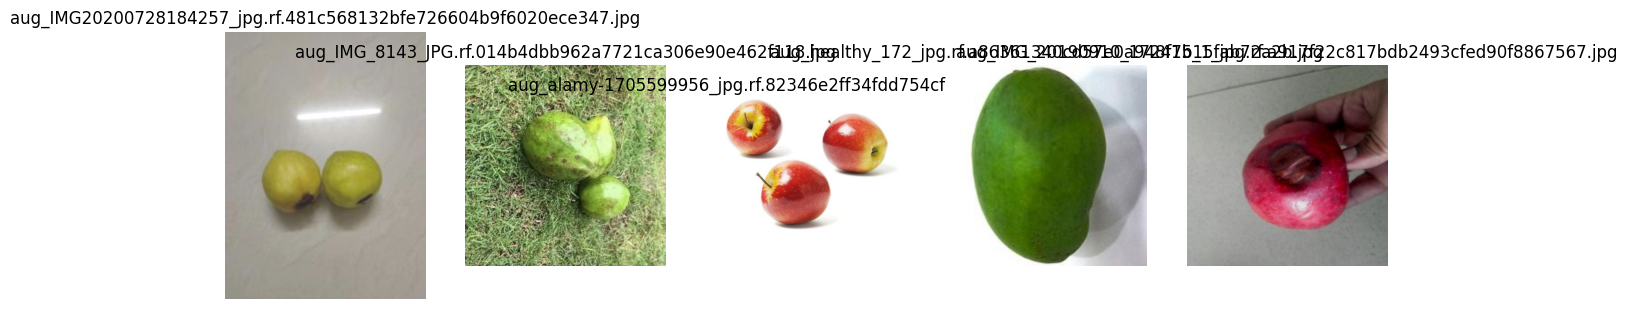

In [17]:
import cv2
import matplotlib.pyplot as plt
import os

AUGMENTED_PATH = "/kaggle/working/augmented_dataset/images"

# List augmented images
augmented_images = os.listdir(AUGMENTED_PATH)

# Select first 5 images to display
num_images = min(5, len(augmented_images))  # Avoid errors if fewer images exist
selected_images = augmented_images[:num_images]

# Display images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(AUGMENTED_PATH, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display
    
    axes[i].imshow(img)
    axes[i].set_title(img_name)
    axes[i].axis("off")

plt.show()


In [18]:
AUG_LABELS_PATH = "/kaggle/working/augmented_dataset/labels"
print("Total augmented labels:", len(os.listdir(AUG_LABELS_PATH)))


Total augmented labels: 0


In [19]:
import os
import shutil
import albumentations as A
import cv2
from tqdm import tqdm

# ✅ Paths
DATASET_PATH = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14"
OUTPUT_PATH = "/kaggle/working/augmented_dataset"

IMG_INPUT_PATH = os.path.join(DATASET_PATH, "train/images")  # Modify for valid/test if needed
LBL_INPUT_PATH = os.path.join(DATASET_PATH, "train/labels")

IMG_OUTPUT_PATH = os.path.join(OUTPUT_PATH, "images")
LBL_OUTPUT_PATH = os.path.join(OUTPUT_PATH, "labels")

# ✅ Create output directories if they don't exist
os.makedirs(IMG_OUTPUT_PATH, exist_ok=True)
os.makedirs(LBL_OUTPUT_PATH, exist_ok=True)

# ✅ Define Augmentations: Only Brightness and Flipping (as per Base Paper)
transform = A.Compose([
    A.RandomBrightnessContrast(p=1.0),  # Apply brightness change
    A.HorizontalFlip(p=1.0)  # Flip image horizontally
])

# ✅ Process Each Image
for img_name in tqdm(os.listdir(IMG_INPUT_PATH)):
    img_path = os.path.join(IMG_INPUT_PATH, img_name)
    label_path = os.path.join(LBL_INPUT_PATH, img_name.replace(".jpg", ".txt"))  # Adjust extension if needed

    if not os.path.exists(label_path):
        print(f"❌ Skipping {img_name} (Label not found)")
        continue

    # ✅ Read Image
    image = cv2.imread(img_path)
    if image is None:
        print(f"❌ Error reading {img_name}")
        continue

    # ✅ Apply Augmentations
    augmented = transform(image=image)['image']

    # ✅ Save Augmented Image
    aug_img_name = "aug_" + img_name
    aug_img_path = os.path.join(IMG_OUTPUT_PATH, aug_img_name)
    cv2.imwrite(aug_img_path, augmented)

    # ✅ Copy Label File to Output
    aug_lbl_path = os.path.join(LBL_OUTPUT_PATH, "aug_" + img_name.replace(".jpg", ".txt"))
    shutil.copy(label_path, aug_lbl_path)

print("✅ Data augmentation completed successfully!")


100%|██████████| 2192/2192 [00:18<00:00, 120.09it/s]

✅ Data augmentation completed successfully!


In [20]:
import os

IMG_OUTPUT_PATH = "/kaggle/working/augmented_dataset/images"
LBL_OUTPUT_PATH = "/kaggle/working/augmented_dataset/labels"

print("Total augmented images:", len(os.listdir(IMG_OUTPUT_PATH)))
print("Total augmented labels:", len(os.listdir(LBL_OUTPUT_PATH)))


Total augmented images: 2192
Total augmented labels: 2192


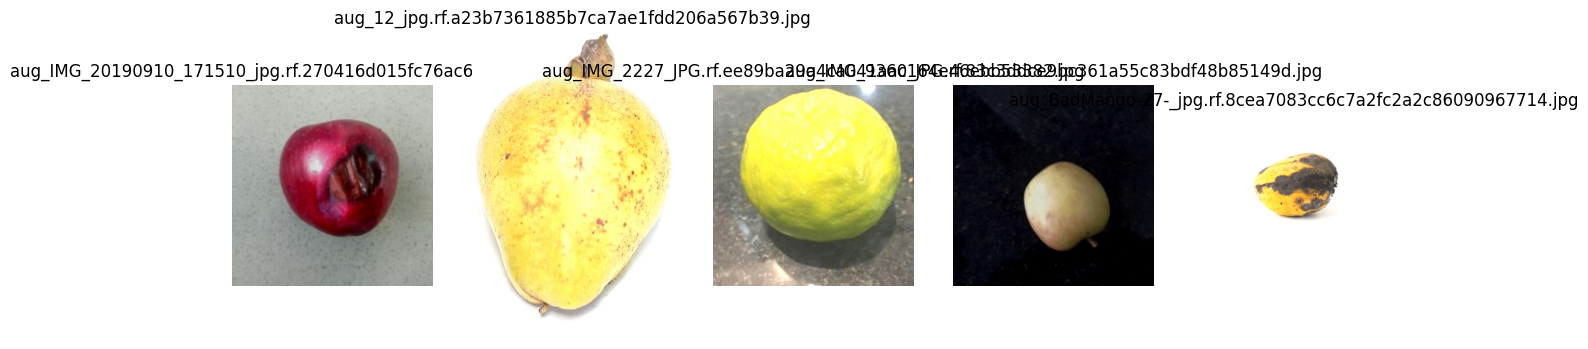

In [21]:
import cv2
import matplotlib.pyplot as plt
import random

# Define paths
IMG_OUTPUT_PATH = "/kaggle/working/augmented_dataset/images"

# Pick 5 random images
sample_images = random.sample(os.listdir(IMG_OUTPUT_PATH), 5)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for idx, img_name in enumerate(sample_images):
    img = cv2.imread(os.path.join(IMG_OUTPUT_PATH, img_name))[:, :, ::-1]  # Convert BGR to RGB
    axes[idx].imshow(img)
    axes[idx].axis("off")
    axes[idx].set_title(img_name)
plt.show()


In [22]:
import random

LBL_OUTPUT_PATH = "/kaggle/working/augmented_dataset/labels"

# Pick 3 random label files
sample_labels = random.sample(os.listdir(LBL_OUTPUT_PATH), 3)

# Print contents of 3 random label files
for label in sample_labels:
    with open(os.path.join(LBL_OUTPUT_PATH, label), "r") as f:
        print(f"🔹 {label}:\n", f.read())
        print("-" * 40)


🔹 aug_IMG_20190910_172259_1_jpg.rf.9afa075a460f9412c75e3c3954e34e75.txt:
 0 0.4515625 0.4453125 0.746875 0.6609375
----------------------------------------
🔹 aug_IMG_20190910_171754_1_jpg.rf.6c158d00c6425755cdaed933fa229f44.txt:
 0 0.478125 0.4671875 0.5734375 0.6
----------------------------------------
🔹 aug_pngtree-rotten-mango-fruit-isolated-png-image_13149281_jpg.rf.85de65485a05a83959305586f3093a72.txt:
 2 0.5046875 0.4828125 0.634375 0.8515625
----------------------------------------


In [23]:
import random

ORIG_LABELS_PATH = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels"  # Change this path if needed

# Pick 3 random label files from original dataset
sample_labels = random.sample(os.listdir(ORIG_LABELS_PATH), 3)

# Print contents
for label in sample_labels:
    with open(os.path.join(ORIG_LABELS_PATH, label), "r") as f:
        print(f"📄 {label}:\n", f.read())
        print("-" * 40)


📄 BadMango-31-_jpg.rf.cb3cddc13e83cea2e74caa04a0897254.txt:
 2 0.518595041322314 0.5625 0.53099173553719 0.703125
----------------------------------------
📄 orange-fruit-navel-isolated-on-white-background-1-_jpg.rf.a13b36b00a4846a530462e350927254e.txt:
 7 0.5046875 0.5 0.6578125 0.7828125
----------------------------------------
📄 lasio_002_jpg.rf.077119c6139da60e1042159961181ceb.txt:
 2 0.49375 0.4953125 0.921875 0.9796875
----------------------------------------


In [24]:
data_yaml = """
train: /kaggle/working/augmented_dataset
val: /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid

nc: 8
names:
  - Bad_Apple
  - Bad_Guava
  - Bad_Mango
  - Bad_Orange
  - Good_Apple
  - Good_Guava
  - Good_Mango
  - Good_Orange
"""

# Save the updated YAML file
yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, "w") as file:
    file.write(data_yaml)

print(f"✅ `data.yaml` has been updated and saved at: {yaml_path}")


✅ `data.yaml` has been updated and saved at: /kaggle/working/data.yaml


In [28]:
import yaml

# Load and print the dataset YAML
yaml_path = "/kaggle/working/data.yaml"

with open(yaml_path, "r") as file:
    dataset_info = yaml.safe_load(file)

print(dataset_info)



{'train': '/kaggle/working/augmented_dataset', 'val': '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid', 'nc': 8, 'names': ['Bad_Apple', 'Bad_Guava', 'Bad_Mango', 'Bad_Orange', 'Good_Apple', 'Good_Guava', 'Good_Mango', 'Good_Orange']}


In [29]:
import os

train_labels_path = "/kaggle/working/augmented_dataset/labels"
label_files = os.listdir(train_labels_path) if os.path.exists(train_labels_path) else []

print(f"Total labels found: {len(label_files)}")
print(label_files[:5])  # Show first 5 label files


Total labels found: 2192
['aug_alternaria_005_jpg.rf.a79d593cf8ca1dd2c22d8941f3cd1648.txt', 'aug_20190813_121732_jpg.rf.479ace900dfcd8453551528fbd6066bd.txt', 'aug_217_jpg.rf.9c3d3bbf77e4f404bbac0952479a5777.txt', 'aug_healthy_093_jpg.rf.cc064be9464ff52b0321326acd7b33f0.txt', 'aug_IMG_20190923_182238_jpg.rf.ab13aa313fa67d88a6cd4348a33fa413.txt']


In [30]:
import os

train_path = "/kaggle/working/augmented_dataset"
images_path = os.path.join(train_path, "images")
labels_path = os.path.join(train_path, "labels")

print(f"📂 Total Images: {len(os.listdir(images_path))}")
print(f"📂 Total Labels: {len(os.listdir(labels_path))}")


📂 Total Images: 2192
📂 Total Labels: 2192


In [ ]:
from ultralytics import YOLO

# Initialize YOLO model from scratch (no pretrained weights)
model = YOLO('yolov8s.yaml')  # Using YOLOv8s architecture

# Train the model
model.train(
    data='/kaggle/working/data.yaml',  # Path to your data.yaml
    epochs=10,  # Adjust as needed
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/kaggle/working/fruitnet_training_scratch',  # Custom project folder
    name='experiment1',  # Experiment name
    device=0  # Use GPU if available
)

# Save the best model path
print("✅ Training Completed!")
print(f"Model saved at: /kaggle/working/fruitnet_training_scratch/experiment1/weights/best.pt")


In [31]:
from ultralytics import YOLO

# Initialize YOLO model from scratch (no pretrained weights)
model = YOLO('yolov8s.yaml')  # Using YOLOv8s architecture

# Train the model
model.train(
    data='/kaggle/working/data.yaml',  # Path to dataset configuration
    epochs=20,  # Number of training epochs
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/kaggle/working/fruitnet_training',  # Project directory
    name='experiment1',  # Experiment name
    pretrained=False,  # Training from scratch
)

print("✅ Training completed successfully!")

# Display the trained model path
best_model_path = "/kaggle/working/fruitnet_training_scratch/experiment1/weights/best.pt"
print(f"📂 Best model saved at: {best_model_path}")


Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/fruitnet_training, name=experiment1, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /kaggle/working/augmented_dataset/labels... 2192 images, 14 backgrounds, 0 corrupt: 100%|██████████| 2192/2192 [00:01<00:00, 1176.87it/s]

train: New cache created: /kaggle/working/augmented_dataset/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid/labels... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<00:00, 203.37it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/fruitnet_training/experiment1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/fruitnet_training/experiment1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.76G      2.804      4.366      3.916         51        640: 100%|██████████| 137/137 [00:36<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


                   all        141        202      0.845     0.0903     0.0625      0.036

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.77G      2.319      3.813      3.128         41        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        141        202      0.719     0.0646      0.096     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.77G      1.965      3.448      2.651         50        640: 100%|██████████| 137/137 [00:35<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]

                   all        141        202     0.0616       0.23     0.0984     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.77G       1.81      3.217      2.453         39        640: 100%|██████████| 137/137 [00:36<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all        141        202       0.41      0.244      0.181      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.77G      1.707      2.982      2.301         44        640: 100%|██████████| 137/137 [00:36<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        141        202      0.256      0.391      0.186      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.77G      1.615      2.854       2.22         49        640: 100%|██████████| 137/137 [00:36<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all        141        202      0.406      0.221      0.252      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.77G      1.573      2.745      2.155         53        640: 100%|██████████| 137/137 [00:36<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]

                   all        141        202      0.295       0.42      0.326      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.77G      1.537      2.649      2.097         58        640: 100%|██████████| 137/137 [00:36<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        141        202      0.248      0.407      0.317      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.77G      1.496      2.546      2.052         51        640: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        141        202      0.352      0.417      0.353      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.77G      1.455      2.455      2.014         50        640: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

                   all        141        202      0.289      0.416      0.299      0.223


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.77G      1.324      2.277      2.031         18        640: 100%|██████████| 137/137 [00:36<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202       0.37      0.414       0.41      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.77G      1.275      2.117       1.93         19        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        141        202      0.343      0.382      0.357      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.77G      1.232      2.052      1.902         22        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        141        202      0.444      0.443      0.418      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.77G      1.188      1.942      1.837         22        640: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        141        202      0.436       0.49      0.477      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.77G      1.183      1.858      1.826         30        640: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        141        202      0.433      0.423       0.45      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.77G      1.144      1.804      1.784         20        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]

                   all        141        202      0.415      0.487      0.484      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.77G      1.104      1.709      1.755         17        640: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        141        202      0.651      0.395      0.517      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.77G      1.096      1.654      1.737         29        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        141        202      0.589      0.441      0.524      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.77G      1.061      1.599      1.689         22        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        141        202      0.458      0.515      0.532      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.77G      1.047      1.541      1.668         24        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        141        202      0.565      0.471      0.551      0.377



20 epochs completed in 0.212 hours.
Optimizer stripped from /kaggle/working/fruitnet_training/experiment1/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/fruitnet_training/experiment1/weights/best.pt, 22.5MB

Validating /kaggle/working/fruitnet_training/experiment1/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]


                   all        141        202      0.565      0.472      0.552      0.377
             Bad_Apple         25         26      0.796      0.601      0.765      0.434
             Bad_Guava         15         19      0.366      0.474      0.453      0.199
             Bad_Mango         14         17      0.481      0.765      0.726      0.534
            Bad_Orange         27         36      0.707      0.535      0.664      0.554
            Good_Apple         15         31      0.412      0.114      0.228      0.147
            Good_Guava         15         26      0.432      0.231       0.31      0.191
            Good_Mango         15         29      0.701      0.586      0.628      0.442
           Good_Orange         15         18      0.628       0.47      0.641      0.513


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /kaggle/working/fruitnet_training/experiment1
✅ Training completed successfully!
📂 Best model saved at: /kaggle/working/fruitnet_training_scratch/experiment1/weights/best.pt


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment1/weights/best.pt"
model = YOLO(model_path)

# Select a test image (You can replace this with any image path)
test_image = "/kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_108.jpg"  # Replace with an actual test image path

# Run inference
results = model(test_image)

# Display the results
for r in results:
    im_array = r.plot()  # Get image with detections
    plt.figure(figsize=(8, 8))
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/fruitnet_training_scratch/experiment1/weights/best.pt'

In [3]:
import os

training_dir = "/kaggle/working/fruitnet_training_scratch/experiment1/weights"

if os.path.exists(training_dir):
    print("Files in weights directory:", os.listdir(training_dir))
else:
    print("❌ Weights directory not found!")


❌ Weights directory not found!


In [4]:
import os

# Check for the actual directory containing the trained model
base_path = "/kaggle/working/fruitnet_training_scratch/experiment1/weights"
if os.path.exists(base_path):
    print("📂 Model Checkpoints:", os.listdir(base_path))
else:
    print("❌ Weights folder not found. Checking alternative paths...")

# Alternative check in case training saved somewhere else
alt_path = "/kaggle/working/fruitnet_training/experiment1/weights"
if os.path.exists(alt_path):
    print("📂 Alternative Path Checkpoints:", os.listdir(alt_path))
else:
    print("❌ Model weights STILL missing! Check training logs.")


❌ Weights folder not found. Checking alternative paths...
📂 Alternative Path Checkpoints: ['last.pt', 'best.pt']


In [5]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/kaggle/working/fruitnet_training/experiment1/weights/best.pt')

# Check if the model is loaded properly
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [6]:
# Run inference on a test image
results = model('/kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_108.jpg', save=True)

# Show predictions
results.show()



image 1/1 /kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_108.jpg: 640x640 (no detections), 16.3ms
Speed: 18.1ms preprocess, 16.3ms inference, 174.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


AttributeError: 'list' object has no attribute 'show'